In [1]:
# !pip list

# profit estimation of companies with linear regression

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import pandas as pd # Data analysis
from sklearn.model_selection import train_test_split # Spliting data
from sklearn.linear_model import LinearRegression # Perform modelling

### loading the dataset

In [2]:
companies = pd.read_csv(r"C:\Users\HP\Python\Algorithms\Linear Regression\1000_Companies.csv")
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
len(companies)

1000

In [4]:
companies['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
companies.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
companies["State"] = companies["State"].astype('category')
companies.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [7]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
companies["State"] = companies["State"].cat.codes
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
companies.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Linear Relationship between the features and target

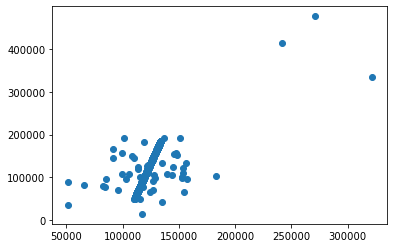

In [10]:
plt.scatter(companies['Administration'], companies['Profit'])

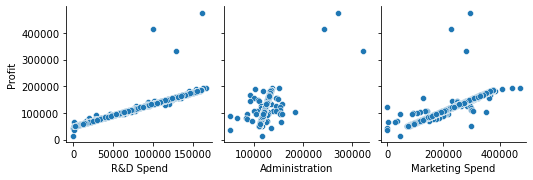

In [11]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(companies, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'], y_vars='Profit')

# Little or no Multicollinearity between the features

In [12]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [12]:
companies.iloc[:,:-2].corr() # Neglect profit column, as it is DV
# Also, State column is also neglected

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


### Extracting independent and dependent variables

In [13]:
# X = companies.iloc[:,:-1].values
# y = companies.iloc[:,4].values

In [14]:
# x = companies[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
# y = comapnies['Profit']

In [15]:
X = companies.drop('Profit', axis = 1) #IV
y = companies['Profit'] # DV

### splitting dataset into train and test

In [16]:
# from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 1234)

In [17]:
len(companies)

1000

In [18]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
# X_train(input - 800), y_train(ouput - 800) ---> passing to the model ---> Model gets trained 
# based on this
# X_test(Input - 200) ---> With what the model has learned it will predict on X_test and 
# give the value predicted values
# 200 ---> Predicted values of y_test

# y_pred(predicted values) y_test(actual values)

#      100                           99
    
# abs(100 - 99) ---> 1

### fitting model to training set

In [19]:
# from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Training the model
# lin_reg.fit(1 + 1, 2)
# lin_reg.fit([R&D Spend,Administration,Marketing Spend,State], Profit)
# X_train,X_test,y_train,y_test
y_pred = lin_reg.predict(X_test)# y_test predicted values values we will be getting here
# y_pred = lin_reg.predict(2 + 2) ------ 4
# lin_reg.predict([R&D Spend,Administration,Marketing Spend,State]) ---- 102547
y_pred

array([ 92684.48158625, 165712.64511428, 106185.49367418, 120185.39112611,
       102996.39130356,  91739.87116282,  65258.81126762, 108749.32546159,
       176285.27826645, 169725.89173091,  65857.51149213, 106624.33493479,
        89218.68500817, 111759.26041472, 154874.12591324, 175148.97139561,
       132825.0990128 , 163831.65094825, 158594.32923765,  81985.03445429,
       104091.58452593, 135809.48374855,  52047.58950868,  90978.16338634,
       181247.62664093,  58396.1601519 ,  83798.56481057,  59729.22202249,
       135079.32017467, 129709.10752428, 170142.54979795, 183474.04873964,
       142134.3392186 , 182251.31641072,  55002.64330927, 143415.39456435,
        80463.37108303, 166531.33325015,  99105.14285798, 159912.3849944 ,
       182543.01683028,  91799.05476739, 129432.70659773, 114104.42773059,
       106825.30754718,  53383.23284862, 106105.4697487 , 185737.76442265,
        57038.71172748, 106819.66234411, 142063.59135047, 138352.37083054,
        53223.85626136,  

In [ ]:
# lin_reg.predict(NEW_DATA)
# lin_reg.predict([R&D Spend,Administration,Marketing Spend,State])

In [20]:
X_test.head(1)

,R&D Spend,Administration,Marketing Spend,State
681,50884.0,117971.8765,166959.8561,1


In [21]:
lin_reg.predict([[200000,300000,500000,2],[250000,275674,123456,1]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([397737.93972819, 362123.35117151])

In [22]:
lin_reg.predict([[100000, 150000, 123450, 0],[250000,165777,350000,2],[500000,275000,755555,1]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([148363.30089416, 265352.29941264, 550772.17479718])

In [ ]:
y_test # ACTUAL VALUE

In [ ]:
X_test.columns

In [24]:
lin_reg.predict([[100000, 150000, 123450,0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([148363.30089416])

### evaluating the model

In [23]:
# calculating the  R squared  # 0 - 1
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # ACTUAL and PREDICTED
# CLOSER TO ONE

0.9811412201793065

In [25]:
def mean_absolute_percentage_error(y_test, y_pred): # MAPE
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [26]:
mean_absolute_percentage_error(y_test, y_pred) # 0 - infinity
# CLOSER TO ZERO

0.9553208885689051